In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("../data/sales_data.csv")
df.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000.0,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000.0,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000.0,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000.0,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900.0,3,1,1249,87.99,Short Sale


In [10]:
df.columns

Index(['MLS', 'Location', 'Price', 'Bedrooms', 'Bathrooms', 'Size',
       'Price/SQ.Ft', 'Status'],
      dtype='object')

In [11]:
filtered_df = df[df['Price'] > 1000000]
filtered_df.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
20,140077,Morro Bay,1100000.0,4,3,4168,263.92,Short Sale
21,140080,Cayucos,1500000.0,3,3,3880,386.60,Short Sale
37,142340,Pismo Beach,1100000.0,3,3,2602,422.75,Short Sale
45,142977,Templeton,1150000.0,4,5,5500,209.09,Short Sale
53,143436,Templeton,1399000.0,4,3,6500,215.23,Foreclosure


In [12]:
df['Revenue'] = df['Price']

In [13]:
filtered_df = df[df['Revenue'] > 1000000]
filtered_df.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status,Revenue
20,140077,Morro Bay,1100000.0,4,3,4168,263.92,Short Sale,1100000.0
21,140080,Cayucos,1500000.0,3,3,3880,386.60,Short Sale,1500000.0
37,142340,Pismo Beach,1100000.0,3,3,2602,422.75,Short Sale,1100000.0
45,142977,Templeton,1150000.0,4,5,5500,209.09,Short Sale,1150000.0
53,143436,Templeton,1399000.0,4,3,6500,215.23,Foreclosure,1399000.0


In [14]:
df.isnull().sum()

MLS            0
Location       0
Price          0
Bedrooms       0
Bathrooms      0
Size           0
Price/SQ.Ft    0
Status         0
Revenue        0
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [17]:
premium_properties = df[df['Price'] > 1500000]
premium_properties.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status,Revenue
219,150439,Arroyo Grande,1900000.0,4,5,5411,351.14,Short Sale,1900000.0
248,150949,Nipomo,1700000.0,3,5,4463,380.91,Short Sale,1700000.0
286,151419,Pismo Beach,1799000.0,4,4,3609,498.48,Foreclosure,1799000.0
407,152768,Avila Beach,1999000.0,4,5,5307,376.67,Short Sale,1999000.0
692,154434,Cambria,2000000.0,4,4,3576,559.28,Regular,2000000.0


In [18]:
avg_price_location = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
avg_price_location.head(10)

Location
 Bradley            1.600000e+06
Cayucos             1.500000e+06
 San Luis Obispo    1.444667e+06
Avila Beach         1.205667e+06
 Oceano             1.195000e+06
 Out Of Area        1.195000e+06
 Cambria            1.076333e+06
 Arroyo Grande      1.013958e+06
Santa Ynez          8.818000e+05
Pismo Beach         7.723746e+05
Name: Price, dtype: float64

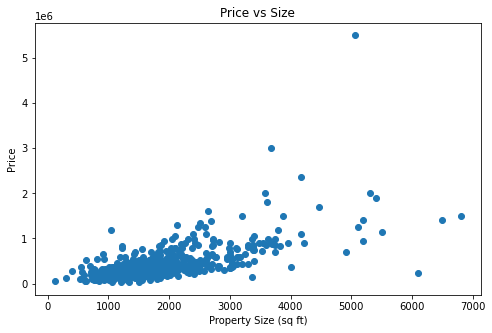

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Size'], df['Price'])
plt.xlabel("Property Size (sq ft)")
plt.ylabel("Price")
plt.title("Price vs Size")
plt.show()

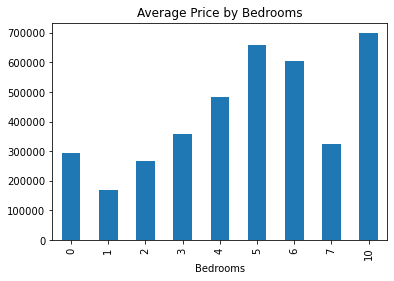

In [20]:
df.groupby('Bedrooms')['Price'].mean().plot(kind='bar')
plt.title("Average Price by Bedrooms")
plt.show()